In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import csv
import io
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?export=download&id=1flTTzCX8aZOOX11CidgUvZcc_VrQTAi5'

# Source: https://github.com/cloudmesh/cloudmesh-nn/blob/master/cloudmesh/nn/service/data.py
def download_data(url, filename):
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)
    return

download_data(url, './data/TETRIS_DOWNLOAD.csv')

# Source: https://realpython.com/python-csv/
with open('./data/TETRIS_DOWNLOAD.csv') as csv_file:
    entries = []
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        print(row)
        if line_count == 0:
            line_count += 1
        else:
            new_entry = row
            entries.append(new_entry)
            line_count += 1

    print(f'Processed {line_count} lines.')

['Name', 'Year', 'Rank', 'CompScore', 'RoundsWon']
['Joseph Saelee', '2018', '1', '0', '5']
['Jonas', '2018', '2', '1760100', '5']
['Green Tea', '2018', '3', '1754760', '4']
['Koryan', '2018', '4', '1280180', '4']
['Harry Hong', '2018', '5', '831880', '3']
['ZZYZX', '2018', '6', '1533045', '3']
['Josh Tolles', '2018', '7', '1384105', '3']
['Svavar', '2018', '8', '1064760', '3']
['Terry Purcell', '2018', '9', '952281', '2']
['Jeff Moore', '2018', '10', '1494351', '2']
['Alex Kerr', '2018', '11', '1279537', '2']
['Chad Muse', '2018', '12', '1134240', '2']
['Ben Mullen', '2018', '13', '1132700', '2']
['Jani Herlevi', '2018', '14', '1127640', '2']
['Joey', '2018', '15', '723413', '2']
['Matt Buco', '2018', '16', '679564', '2']
['Mike Winzinek', '2018', '17', '880054', '1']
['Frank Westphal', '2018', '18', '638213', '1']
['Packie', '2018', '19', '523200', '1']
['Matt Schoolmaster', '2018', '20', '1257237', '1']
['Eli Markstrom', '2018', '21', '1154939', '1']
['SQR', '2018', '22', '1045411',

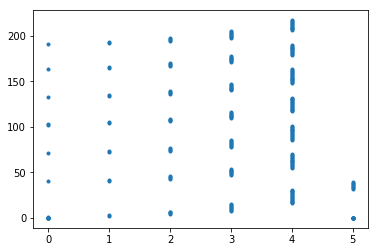

In [4]:
scores = []
rounds = []
for e in entries:
    scores.append(e[3])
    rounds.append(e[4])
    
plt.plot(rounds, scores, '.')
plt.yscale('linear')
plt.xscale('linear')
plt.show()

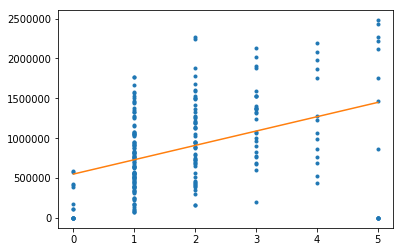

R^2 Value:  0.16027514518022234
P Value:  2.424461117684154e-10


In [5]:
from scipy import stats as st

X = np.array(rounds).astype(np.int)
Y = np.array(scores).astype(np.float32)

slope, intercept, r_val, p_val, std_err = st.linregress(X, Y)

plt.plot(X, Y, '.')
plt.plot(X, slope*X + intercept, '-')
plt.yscale('linear')
plt.xscale('linear')
plt.show()

print("R^2 Value: ", r_val**2)
print("P Value: ", p_val)

In [17]:
#from sklearn.linear_model import LinearRegression

#x_train, x_test, y_train, y_test = X[:186], X[46:], Y[:186], Y[46:]

#lin_reg = LinearRegression()
#lin_reg.fit([x_train], [y_train])

#y_pred = lin_reg.predict([x_test])

#MSE = metrics.mean_squared_error(y_pred, [y_test])
#print(MSE)